# Niveles de Referencia en  CT, Medicina Nuclear INC

Elaborado por: Andrea Lizeth Lopez Rodriguez. Estudiante
Dirigido por: Nathaly Barbosa, Física Médica de Medicina nuclear del INC    

Inicialmente se importan los paquetes de Python que serán empleados en el análisis de los datos

In [11]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


##Archivo plano de texto, colocar los datos y los encabezados sin espacios 
#Para cargar los datos
#data = pd.read_csv('DRLCT.txt', delim_whitespace =True)

data = pd.read_csv('DRLSPECT.txt', delim_whitespace =True)

#para ver los primeros datos
data.head()

,CTDIvol,DLP,Tipo,EkV,EmA,skV,smA
0,3.06,95.85,Pulmonar,100,100,100,10
1,2.46,81.52,Rastreo,100,120,80,10
2,1.54,133.66,OSEA,100,42,80,10
3,1.28,51.75,OSEA,100,40,80,10
4,1.61,124.08,OSEA,100,79,80,10


In [12]:
######Conteo de variables categoricas
#data["Genero"].value_counts()


data["Tipo"].value_counts()


####GROUP BY in Python 
#data_test =data[['Tipo','DLP','CTDIvol']]
#data_grp=data_test.groupby(['Protocolo'],as_index=False).median()
#data_grp


####Pandas Method- Pivot()

#data_pivot=data_grp.pivot(index='Protocolo', columns='Genero')
#data_pivot

#####Heatmap
#plt.pcolor(data_pivot,cmap='RdBu')
#plt.colorbar()
#plt.show

#Filtrando datos por Genero 
#Masculino = ['M']
#FEMENINO
#data_femenino= data[~data.Genero.isin(Masculino)]
#data_femenino.shape
#MASCULINO
#data_masculino=data[data.Genero.isin(Masculino)]
#data_masculino.shape

OSEA            89
Rastreo         60
Pulmonar        10
Paratiroides     8
Centinela        7
ROLL             2
MIBG             2
HYNIC            2
Tumoral          1
Name: Tipo, dtype: int64

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,CTDIvol,DLP,Tipo,EkV,EmA,skV,smA
count,89.000000,89.000000,89,89.000000,89.000000,89.000000,89.000000
unique,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,OSEA,NaN,NaN,NaN,NaN
freq,NaN,NaN,89,NaN,NaN,NaN,NaN
mean,2.344157,144.004270,NaN,105.168539,81.764045,81.797753,13.146067
std,1.732255,126.394799,NaN,8.805004,17.402339,8.334184,11.139151
min,1.180000,45.260000,NaN,100.000000,40.000000,80.000000,10.000000
25%,1.640000,74.110000,NaN,100.000000,79.000000,80.000000,10.000000
50%,1.640000,117.690000,NaN,100.000000,79.000000,80.000000,10.000000
75%,2.720000,151.380000,NaN,120.000000,79.000000,80.000000,10.000000


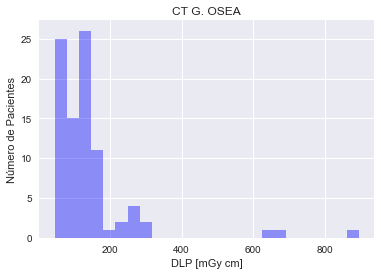

In [14]:
######################## CTWB ##############################

is_CTWBf =  data['Tipo']=='OSEA'
#is_CTWBf.head()
data_CTWBf=data[is_CTWBf]
#data_CTWBf.shape
###Masculino
#is_CTWBm =  data_masculino['Protocolo']=='CTWB'
#data_CTWBm=data_masculino[is_CTWBm]
#data_CTWBm.shape

###Carga de paquete de estadística (ajustes)
from scipy import stats

sns.distplot(data_CTWBf['DLP'],kde=False,color='b')
plt.title('CT G. OSEA')
plt.xlabel('DLP [mGy cm]')
plt.ylabel('Número de Pacientes')
data_CTWBf.describe(include="all")


######### CTWBPED #####
#is_CTWBPEDf =  data_femenino['Protocolo']=='CTWBPED'
#data_CTWBPEDf=data_femenino[is_CTWBPEDf]
#data_CTWBPEDf.shape

#is_CTWBPEDm =  data_masculino['Protocolo']=='CTWBPED'
#data_CTWBPEDm=data_masculino[is_CTWBPEDm]
#data_CTWBPEDm.shape

######### CTWBOBESO #####
#is_CTWBOBESOf =  data_femenino['Protocolo']=='CTWBOBESO'
#data_CTWBOBESOf=data_femenino[is_CTWBOBESOf]
#data_CTWBOBESOf.shape

#is_CTWBOBESOm =  data_masculino['Protocolo']=='CTWBOBESO'
#data_CTWBOBESOm=data_masculino[is_CTWBOBESOm]
#data_CTWBOBESOm.shape



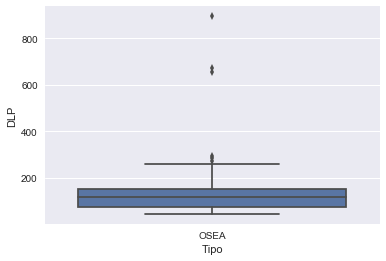

In [15]:
sns.boxplot(x="Tipo", y="DLP", data=data_CTWBf)

,KV,mAs,ref,CTDIvol,DLP
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,121.428571,48.928571,81.928571,2.928571,137.857143
std,5.345225,11.750380,7.216054,0.916875,58.783641
min,120.000000,34.000000,80.000000,2.000000,70.000000
25%,120.000000,38.500000,80.000000,2.000000,94.000000
50%,120.000000,46.000000,80.000000,3.000000,122.500000
75%,120.000000,58.750000,80.000000,4.000000,187.000000
max,140.000000,69.000000,107.000000,4.000000,234.000000


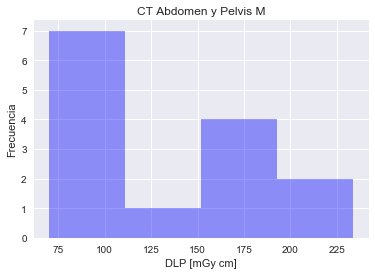

In [76]:
######################## CTABD Y CTABDPELVI ##############################

######### CTABD #####
#is_CTABDf =  data_femenino['Protocolo']=='CTABD'
#data_CTABDf=data_femenino[is_CTABDf]
#data_CTABDf.shape

#is_CTABDm =  data_masculino['Protocolo']=='CTABD'
#data_CTABDm=data_masculino[is_CTABDm]
#data_CTABDm.shape

######### CTABDPELVI #####
#is_CTABDPELVIf =  data_femenino['Protocolo']=='CTABDPELVI'
#data_CTABDPELVIf=data_femenino[is_CTABDPELVIf]
#data_CTABDPELVIf.shape

is_CTABDPELVIm =  data_masculino['Protocolo']=='CTABDPELVI'
data_CTABDPELVIm=data_masculino[is_CTABDPELVIm]
#data_CTABDPELVIm.shape

sns.distplot(data_CTABDPELVIm['DLP'],bins=4,kde=False,color='b')
plt.title('CT Abdomen y Pelvis M')
plt.xlabel('DLP [mGy cm]')
plt.ylabel('Frecuencia')
data_CTABDPELVIm.describe()



In [34]:
######################## CTCYC Y CTCEREBRO ##############################

######### CTCYC #####
#is_CTCYCf =  data_femenino['Protocolo']=='CTCYC'
#data_CTCYCf=data_femenino[is_CTCYCf]
#data_CTCYCf.shape

#is_CTCYCm =  data_masculino['Protocolo']=='CTCYC'
#data_CTCYCm=data_masculino[is_CTCYCm]
#data_CTCYCm.shape

######### CTCEREBRO #####
#is_CTCEREBROf =  data_femenino['Protocolo']=='CTCEREBRO'
#data_CTCEREBROf=data_femenino[is_CTCEREBROf]
#data_CTCEREBROf.shape

#is_CTCEREBROm =  data_masculino['Protocolo']=='CTCEREBRO'
#data_CTCEREBROm=data_masculino[is_CTCEREBROm]
#data_CTCEREBROm.shape

(5, 7)

# ADULTO 

In [85]:
##### CTWB ######
from scipy import stats
is_CTWB =  data['Protocolo']=='CTWB'
data_CTWB=data[is_CTWB]
#data_CTWB.shape
#data_CTWB.head()
data_CTWB.describe()

,KV,mAs,ref,CTDIvol,DLP
count,430.0,430.000000,430.000000,430.000000,430.000000
mean,120.0,60.151163,99.581395,3.537209,382.404651
std,0.0,13.233529,6.130791,0.929828,115.762956
min,120.0,26.000000,10.000000,1.000000,82.000000
25%,120.0,51.000000,100.000000,3.000000,281.000000
50%,120.0,59.000000,100.000000,3.000000,375.000000
75%,120.0,69.000000,100.000000,4.000000,469.000000
max,120.0,105.000000,100.000000,7.000000,787.000000


Donde se presenta en orden el número de datos (count), su promedio (mean), su desviación estandar (std), el valor máximo (max) y el mínimo en cada columna de datos. Adicionalmente se muestra el percentil 25 (25 %), 50 (50 %) y 75 (75 %). Donde el percentil 25 indica que el 25% de los datos tienen un valor menor o igual al reportado. Entonces el percentil 50, hace referencia a la mediana de los datos :)

### Histograma CT WB

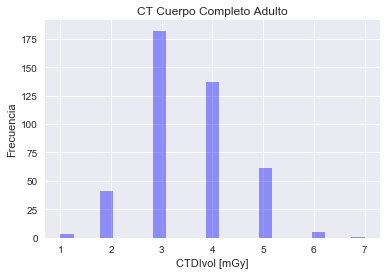

In [86]:
sns.distplot(data_CTWB['CTDIvol'],kde=False,color='b')

### Decoración del histograma
plt.title('CT Cuerpo Completo Adulto')
plt.xlabel('CTDIvol [mGy]')
plt.ylabel('Frecuencia')

In [87]:
######################## CTABDPELVI ##############################

######### CTABDPELVI #####
is_CTABDPELVI =  data['Protocolo']=='CTABDPELVI'
data_CTABDPELVI=data[is_CTABDPELVI]
#data_CTABDPELVI.shape
#data_CTABDPELVI.head()
data_CTABDPELVI.describe()

,KV,mAs,ref,CTDIvol,DLP
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,120.588235,51.029412,80.794118,3.000000,132.058824
std,3.429972,12.671814,4.630462,0.984732,48.283218
min,120.000000,29.000000,80.000000,1.000000,35.000000
25%,120.000000,43.000000,80.000000,2.000000,94.000000
50%,120.000000,49.500000,80.000000,3.000000,140.000000
75%,120.000000,60.000000,80.000000,4.000000,175.750000
max,140.000000,82.000000,107.000000,5.000000,234.000000


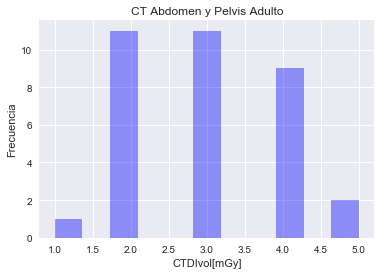

In [99]:
sns.distplot(data_CTABDPELVI['CTDIvol'],bins= 11,kde=False,color='b')

### Decoración del histograma
plt.title('CT Abdomen y Pelvis Adulto')
plt.xlabel('CTDIvol[mGy]')
plt.ylabel('Frecuencia')

In [58]:
######################## CTCYC ##############################

######### CTCYC #####
is_CTCYC =  data['Protocolo']=='CTCYC'
data_CTCYC=data[is_CTCYC]
#data_CTCYC.shape
#data_CTCYC.head()
data_CTCYC.describe()

,KV,mAs,ref,CTDIvol,DLP
count,47.0,47.0,47.0,47.0,47.000000
mean,120.0,170.0,0.0,11.0,431.872340
std,0.0,0.0,0.0,0.0,65.182559
min,120.0,170.0,0.0,11.0,366.000000
25%,120.0,170.0,0.0,11.0,366.000000
50%,120.0,170.0,0.0,11.0,495.000000
75%,120.0,170.0,0.0,11.0,495.000000
max,120.0,170.0,0.0,11.0,495.000000


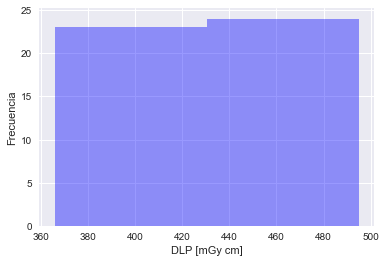

In [63]:
sns.distplot(data_CTCYC['DLP'],kde=False,color='b')

### Decoración del histograma
#plt.title('Todos')
plt.xlabel('DLP [mGy cm]')
plt.ylabel('Frecuencia')

In [66]:
######### CTCEREBRO #####
is_CTCEREBRO =  data['Protocolo']=='CTCEREBRO'
data_CTCEREBRO=data[is_CTCEREBRO]
#data_CTCEREBRO.shape
#data_CTCEREBRO.head()
data_CTCEREBRO.describe()

,KV,mAs,ref,CTDIvol,DLP
count,10.0,10.0,10.0,10.0,10.0
mean,120.0,170.0,0.0,11.0,256.0
std,0.0,0.0,0.0,0.0,0.0
min,120.0,170.0,0.0,11.0,256.0
25%,120.0,170.0,0.0,11.0,256.0
50%,120.0,170.0,0.0,11.0,256.0
75%,120.0,170.0,0.0,11.0,256.0
max,120.0,170.0,0.0,11.0,256.0


In [100]:
#Para cargar los datos
dato = pd.read_csv('DRLSPECT.txt', delim_whitespace =True)

#para ver los primeros datos
dato.head()

,ESTUDIO,CTDIvol
0,OSEA,4.40
1,OSEA,3.56
2,OSEA,4.48
3,OSEA,4.58
4,OSEA,8.94


In [101]:
is_OSEA =  dato['ESTUDIO']=='OSEA'
dato_OSEA=dato[is_OSEA]
#data_CTWB.shape
#data_CTWB.head()
dato_OSEA.describe()

,CTDIvol
count,242.000000
mean,4.455165
std,0.978895
min,1.690000
25%,4.262500
50%,4.550000
75%,4.580000
max,14.680000


In [102]:
is_RASTREO =  dato['ESTUDIO']=='RASTREO'
dato_RASTREO=dato[is_RASTREO]
#data_CTWB.shape
#data_CTWB.head()
dato_RASTREO.describe()

,CTDIvol
count,122.000000
mean,12.787541
std,0.907925
min,4.380000
25%,12.920000
50%,12.920000
75%,12.920000
max,12.920000


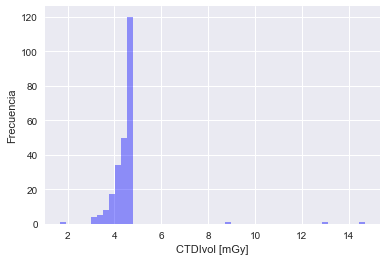

In [103]:
sns.distplot(dato_OSEA['CTDIvol'],kde=False,color='b')

### Decoración del histograma
#plt.title('Todos')
plt.xlabel('CTDIvol [mGy]')
plt.ylabel('Frecuencia')

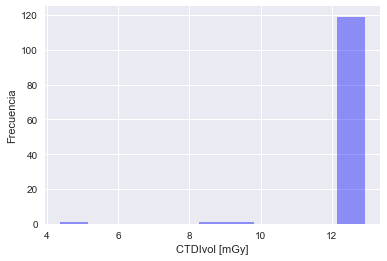

In [104]:
sns.distplot(dato_RASTREO['CTDIvol'],kde=False,color='b')

### Decoración del histograma
#plt.title('Todos')
plt.xlabel('CTDIvol [mGy]')
plt.ylabel('Frecuencia')